In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize 
import pandas as pd
from collections import Counter
import string
import pickle

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Parsing and Processing Content

In [3]:
df_2 = pd.read_csv('../../processed_files/webis/webis.csv')

In [4]:
df_2['RAW_CONTENT_TRIGRAM'] = df_2['text'].apply(lambda row: [' '.join(phrase) for phrase in nltk.trigrams(row.lower().split())])
df_2.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_TRIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte would, comte would not, would not ad..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m. comte, m. comte would, comte would sp..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating the, illustrating the sh..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture exemplifies, picture exemplifies..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of course., of course. and,, course. an..."


In [5]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
df_2_trigram_tokens = [item for sublist in df_2['RAW_CONTENT_TRIGRAM'].values for item in sublist]
df_2_trigram_tokens_stripped = [w.translate(table) for w in df_2_trigram_tokens]
df_2_trigram_tokens_stripped = [phrase.strip() for phrase in df_2_trigram_tokens_stripped if len(phrase.strip().split()) == 3]
df_2_trigram_tokens_stripped[:10]

['m comte would',
 'comte would not',
 'would not advise',
 'not advise so',
 'advise so irrational',
 'so irrational a',
 'irrational a proceeding',
 'a proceeding but',
 'proceeding but m',
 'but m comte']

## StopPhrases

In [7]:
counts_trigrams = Counter(df_2_trigram_tokens_stripped)
counts_trigrams.most_common(150)

[('one of the', 1933),
 ('as well as', 1025),
 ('part of the', 911),
 ('it is not', 848),
 ('there is a', 778),
 ('there is no', 743),
 ('some of the', 692),
 ('it is a', 672),
 ('the end of', 632),
 ('of the most', 608),
 ('i do not', 607),
 ('and it is', 596),
 ('out of the', 588),
 ('and in the', 565),
 ('the name of', 561),
 ('in order to', 555),
 ('to have been', 540),
 ('to be a', 532),
 ('it would be', 527),
 ('it may be', 520),
 ('in the same', 517),
 ('that it was', 481),
 ('that it is', 480),
 ('that he was', 479),
 ('it was a', 479),
 ('the use of', 477),
 ('side of the', 476),
 ('it is the', 475),
 ('it will be', 470),
 ('on the other', 463),
 ('but it is', 457),
 ('at the same', 456),
 ('would have been', 449),
 ('the fact that', 448),
 ('the united states', 446),
 ('of the same', 445),
 ('in the world', 442),
 ('there was a', 441),
 ('the same time', 433),
 ('is to be', 421),
 ('in which the', 420),
 ('as soon as', 419),
 ('to be the', 412),
 ('he did not', 400),
 ('end o

## Heaps' Law Trigrams

In [8]:
df_2.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_TRIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte would, comte would not, would not ad..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m. comte, m. comte would, comte would sp..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating the, illustrating the sh..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture exemplifies, picture exemplifies..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of course., of course. and,, course. an..."


In [9]:
df_2_new = df_2.reset_index()
df_2_new = df_2_new.drop(columns=['index'])
df_2_new.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_TRIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte would, comte would not, would not ad..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m. comte, m. comte would, comte would sp..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating the, illustrating the sh..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture exemplifies, picture exemplifies..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of course., of course. and,, course. an..."


In [10]:
# number of documents processed, number of unique 
num_docs_num_unique = [(0,0)]
unique = set()
for index,row in df_2_new.iterrows():
    unique.update(row['RAW_CONTENT_TRIGRAM'])
    num_docs = index + 1
    num_unique = len(unique)
    num_docs_num_unique.append((num_docs, num_unique))

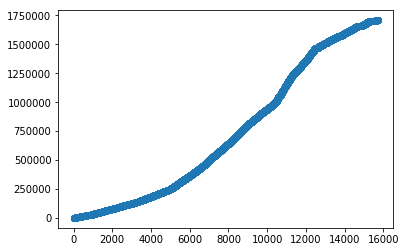

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*num_docs_num_unique)
plt.scatter(x, y)
plt.show()

In [12]:
most_to_least = sorted(counts_trigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_trigrams = []
for index, item in enumerate(most_to_least):
    most_to_least_trigrams.append((index, item[1]))

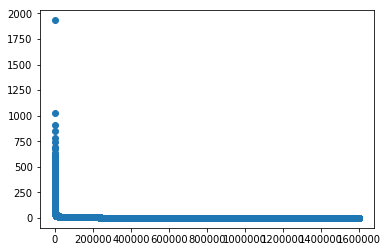

In [13]:
x, y = zip(*most_to_least_trigrams)
plt.scatter(x, y)
plt.show()

## Zipf's Law Trigrams

In [14]:
most_to_least_2 = sorted(counts_trigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_trigrams_2 = []
for index, item in enumerate(most_to_least):
    if index < 0:
        continue
    if index >= 400:
        break
    most_to_least_trigrams_2.append((index, item[1]))

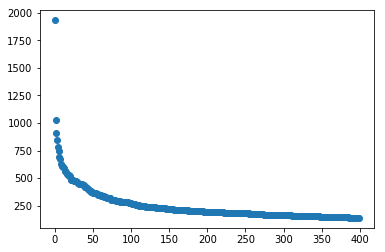

In [15]:
x2, y2 = zip(*most_to_least_trigrams_2)
plt.scatter(x2, y2)
plt.show()

In [16]:
most_to_least_trigrams_2[:30]

[(0, 1933),
 (1, 1025),
 (2, 911),
 (3, 848),
 (4, 778),
 (5, 743),
 (6, 692),
 (7, 672),
 (8, 632),
 (9, 608),
 (10, 607),
 (11, 596),
 (12, 588),
 (13, 565),
 (14, 561),
 (15, 555),
 (16, 540),
 (17, 532),
 (18, 527),
 (19, 520),
 (20, 517),
 (21, 481),
 (22, 480),
 (23, 479),
 (24, 479),
 (25, 477),
 (26, 476),
 (27, 475),
 (28, 470),
 (29, 463)]

## Stop Phrase lists

In [17]:
corpus_trigrams = set([i[0] for i in counts_trigrams.most_common(30)])

In [18]:
with open('../../processed_files/stopwords/webis_corpus_trigrams.pickle', 'wb') as file:
    pickle.dump(corpus_trigrams, file)